# 2 - Impulses Detection

In [21]:
%pylab inline
plt.rcParams['figure.figsize'] = [21, 8]
plt.rcParams['figure.dpi'] = 100

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from bsp.core.io import load_study
study = load_study("data/prueba_fixed.bsp")

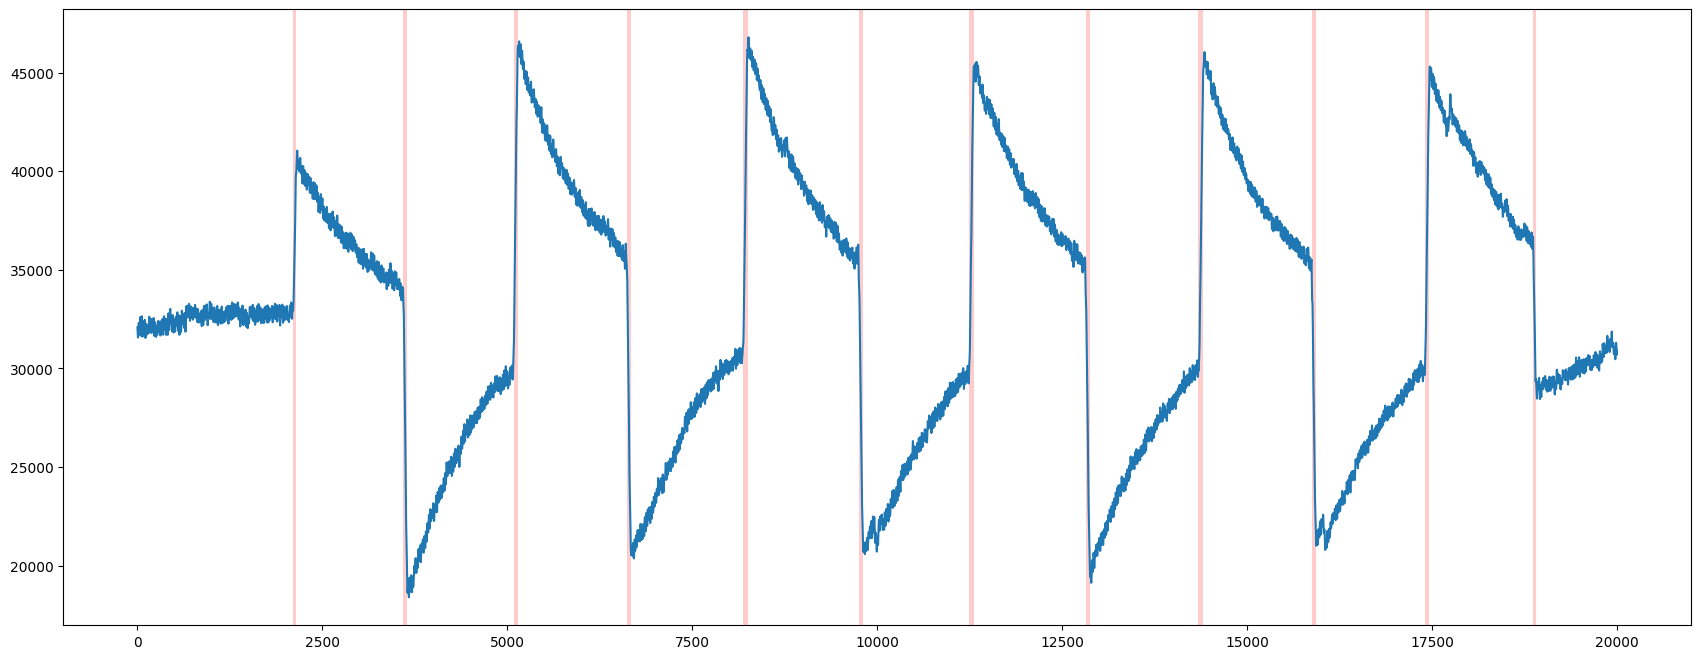

In [42]:
test = study[0]

from sklearn.cluster import KMeans
from scipy.signal import medfilt
from typing import Iterator
from bsp.core.processing import denoise, differentiate

def impulses(channel: ndarray) -> Iterator[tuple[int, int]]:
    denoised_channel = denoise(channel)
    derived_channel = abs(medfilt(differentiate(denoised_channel), 11))
    
    X = derived_channel.reshape((len(filtered_derivative),-1))   
    labels = KMeans(n_clusters=2, n_init='auto').fit_predict(X)

    def iterate_clusters():
        start = None
        for idx, label in enumerate(labels):
            if label == 1:
                if start is None:
                    start = idx
            else:
                if start is not None:
                    yield start, idx
                start = None

    samples = len(channel)
    for start, end in iterate_clusters():
        while start > 1 and derived_channel[start] > derived_channel[start - 1]:
            start -= 1

        while end < samples - 1 and derived_channel[end] > derived_channel[end + 1]:
            end += 1

        yield start, end


channel = test.horizontal_channel

plot(channel)
for start, end in impulses(channel):
    axvspan(start, end, facecolor='r', alpha=0.2)